# Analyzing Vegetable Oil Dataset

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
import datetime

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv("../kaggle/MPOB_data1.csv")
df.head()

,Year,Mon,Month,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,2006,1,Jan,424,532,930,591,733,569,750,445,407
1,2006,2,Feb,445,535,921,595,723,591,761,430,405
2,2006,3,Mar,440,539,902,606,742,575,807,410,431
3,2006,4,Apr,439,540,899,659,796,578,840,394,437
4,2006,5,May,440,588,892,679,838,583,841,408,447


# Understanding Dataset

In [3]:
df.shape

(156, 12)

In [4]:
df.columns

Index(['Year', 'Mon', 'Month', 'CrudePalmOil', 'SoyabeanOil', 'GroundnutOil',
       'SunflowerOil', 'RapeseedOil', 'CoconutOil', 'FishOil', 'Tallow',
       'Lard'],
      dtype='object')

In [5]:
df.dtypes

Year             int64
Mon              int64
Month           object
CrudePalmOil     int64
SoyabeanOil      int64
GroundnutOil     int64
SunflowerOil     int64
RapeseedOil      int64
CoconutOil       int64
FishOil          int64
Tallow           int64
Lard             int64
dtype: object

In [6]:
# summary of numerical fields
df.describe()

,Year,Mon,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
count,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2012.000000,6.50000,777.480769,929.628205,1387.397436,969.826923,973.121795,1127.038462,1454.435897,836.807692,777.352564
std,3.753708,3.46317,230.762508,262.227338,546.803328,339.960115,263.382252,394.250140,496.341729,247.819110,234.200130
min,2006.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,3.75000,659.500000,787.500000,1201.500000,800.000000,814.000000,839.500000,977.250000,734.500000,629.250000
50%,2012.000000,6.50000,761.000000,880.500000,1351.500000,880.000000,895.000000,1127.000000,1562.000000,834.500000,753.000000
75%,2015.000000,9.25000,905.250000,1139.250000,1655.750000,1211.250000,1184.750000,1436.750000,1785.750000,1022.000000,928.500000
max,2018.000000,12.00000,1292.000000,1537.000000,2555.000000,2045.000000,1577.000000,2256.000000,2400.000000,1363.000000,1392.000000


In [7]:
df.describe(include=['object'])

,Month
count,156
unique,12
top,Feb
freq,13


In [8]:
# Check missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year            0
Mon             0
Month           0
CrudePalmOil    0
SoyabeanOil     0
GroundnutOil    0
SunflowerOil    0
RapeseedOil     0
CoconutOil      0
FishOil         0
Tallow          0
Lard            0
dtype: int64

# Correlation Analysis

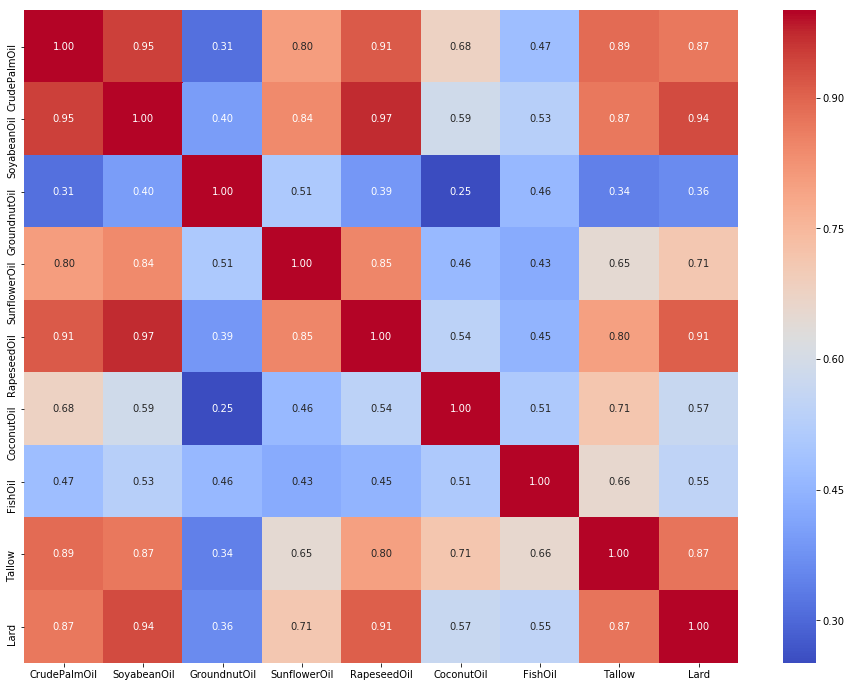

In [9]:
#Correlation with visualization
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [10]:
#Paerson correlation
df.corr()

,Year,Mon,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
Year,1.000000,0.000000,-0.175588,-0.206980,0.003498,-0.281207,-0.338392,0.327093,0.441860,0.103698,-0.134937
Mon,0.000000,1.000000,-0.147770,-0.081684,0.008112,-0.123425,-0.060436,-0.128526,-0.081571,-0.091951,0.042258
CrudePalmOil,-0.175588,-0.147770,1.000000,0.949126,0.314472,0.804982,0.913989,0.677103,0.474278,0.889444,0.868495
SoyabeanOil,-0.206980,-0.081684,0.949126,1.000000,0.399979,0.839351,0.971907,0.588623,0.531197,0.870041,0.935517
GroundnutOil,0.003498,0.008112,0.314472,0.399979,1.000000,0.507232,0.386350,0.251283,0.460919,0.343645,0.364326
SunflowerOil,-0.281207,-0.123425,0.804982,0.839351,0.507232,1.000000,0.845585,0.464293,0.427794,0.648421,0.710695
RapeseedOil,-0.338392,-0.060436,0.913989,0.971907,0.386350,0.845585,1.000000,0.542963,0.448311,0.799167,0.906427
CoconutOil,0.327093,-0.128526,0.677103,0.588623,0.251283,0.464293,0.542963,1.000000,0.508724,0.714827,0.569494
FishOil,0.441860,-0.081571,0.474278,0.531197,0.460919,0.427794,0.448311,0.508724,1.000000,0.656529,0.548124
Tallow,0.103698,-0.091951,0.889444,0.870041,0.343645,0.648421,0.799167,0.714827,0.656529,1.000000,0.874941


In [11]:
#Spearman rank correlation
df.corr('spearman')

,Year,Mon,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
Year,1.000000,0.000000,-0.131159,-0.139358,0.135298,-0.206757,-0.261312,0.439721,0.480347,0.143980,-0.060225
Mon,0.000000,1.000000,-0.080493,0.009237,0.048257,-0.014990,0.091669,-0.063834,-0.068341,-0.043010,0.101173
CrudePalmOil,-0.131159,-0.080493,1.000000,0.939011,0.444701,0.846501,0.887133,0.548077,0.379469,0.862010,0.846294
SoyabeanOil,-0.139358,0.009237,0.939011,1.000000,0.507650,0.860333,0.954661,0.469926,0.401652,0.841519,0.920144
GroundnutOil,0.135298,0.048257,0.444701,0.507650,1.000000,0.563349,0.467294,0.388842,0.539280,0.497271,0.499021
SunflowerOil,-0.206757,-0.014990,0.846501,0.860333,0.563349,1.000000,0.815320,0.375309,0.405747,0.697434,0.757714
RapeseedOil,-0.261312,0.091669,0.887133,0.954661,0.467294,0.815320,1.000000,0.392141,0.272992,0.763267,0.888465
CoconutOil,0.439721,-0.063834,0.548077,0.469926,0.388842,0.375309,0.392141,1.000000,0.438261,0.643530,0.480588
FishOil,0.480347,-0.068341,0.379469,0.401652,0.539280,0.405747,0.272992,0.438261,1.000000,0.566499,0.445013
Tallow,0.143980,-0.043010,0.862010,0.841519,0.497271,0.697434,0.763267,0.643530,0.566499,1.000000,0.847943


In [12]:
#Showing HIGHEST correlated value, over 0.9 and not equal tp 1.0
high_corr = df.corr().columns.values

for col, row in ((df.corr().abs() > 0.9) & (df.corr().abs() != 1.0)).iteritems():
    print(col, high_corr[row.values])

Year []
Mon []
CrudePalmOil ['SoyabeanOil' 'RapeseedOil']
SoyabeanOil ['CrudePalmOil' 'RapeseedOil' 'Lard']
GroundnutOil []
SunflowerOil []
RapeseedOil ['CrudePalmOil' 'SoyabeanOil' 'Lard']
CoconutOil []
FishOil []
Tallow []
Lard ['SoyabeanOil' 'RapeseedOil']


# Data Visualization: Trendline

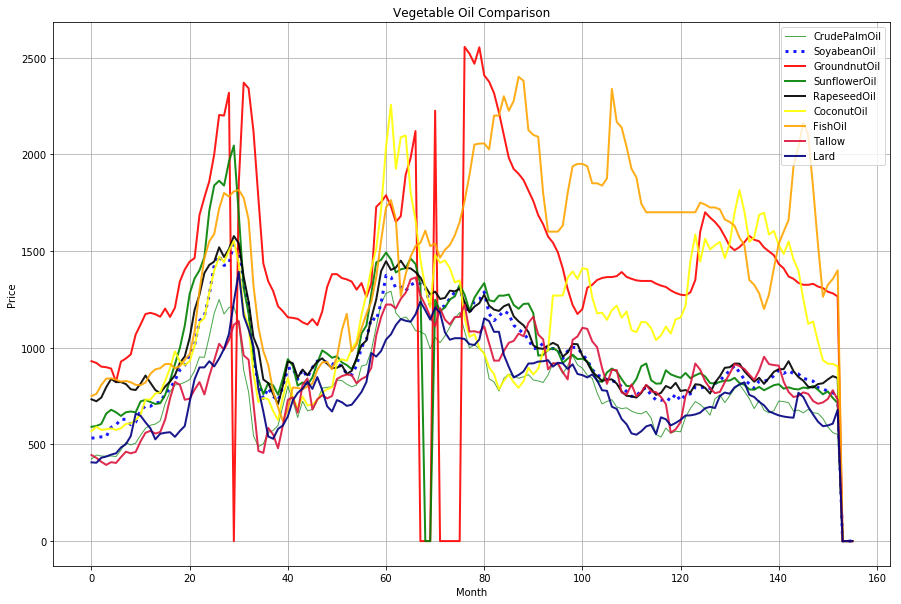

In [13]:
df.CrudePalmOil.plot(x='Year', kind='line', color='green', label='CrudePalmOil', linewidth=1, alpha=0.7, grid=True, linestyle='-',figsize=(15, 10))
df.SoyabeanOil.plot(color='blue', label='SoyabeanOil', linewidth=3, alpha=0.9, grid=True, linestyle=':' )
df.GroundnutOil.plot(color='red', label='GroundnutOil', linewidth=2, alpha=0.9, grid=True, linestyle='-')
df.SunflowerOil.plot(color='green', label='SunflowerOil', linewidth=2, alpha=0.9, grid=True, linestyle='-')
df.RapeseedOil.plot(color='black', label='RapeseedOil', linewidth=2, alpha=0.9, grid=True, linestyle='-')
df.CoconutOil.plot(color='yellow', label='CoconutOil', linewidth=2, alpha=0.9, grid=True, linestyle='-')
df.FishOil.plot(color='orange', label='FishOil', linewidth=2, alpha=0.9, grid=True, linestyle='-')
df.Tallow.plot(color='crimson', label='Tallow', linewidth=2, alpha=0.9, grid=True, linestyle='-')
df.Lard.plot(color='navy', label='Lard', linewidth=2, alpha=0.9, grid=True, linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('Month')
plt.ylabel('Price')

plt.title('Vegetable Oil Comparison')
plt.show()

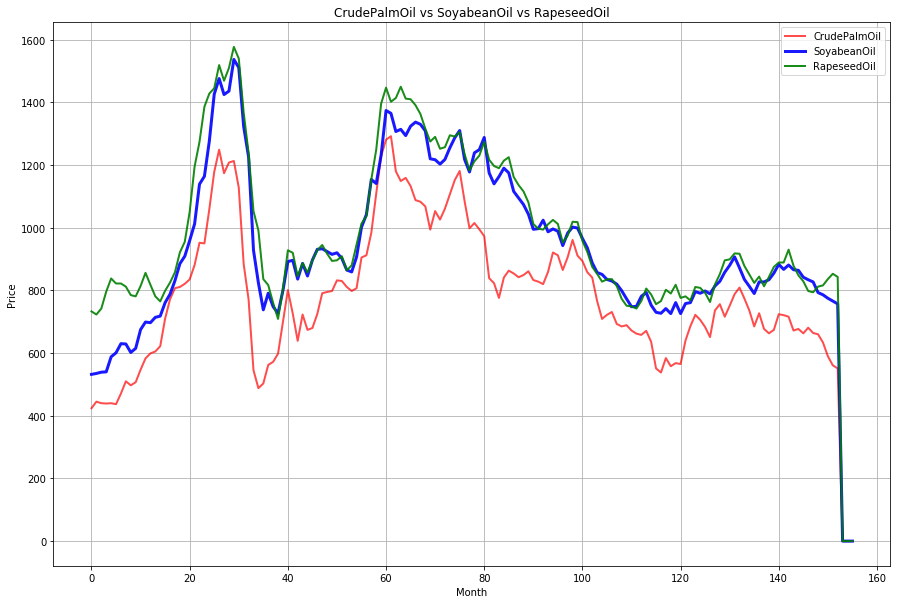

In [14]:
df.CrudePalmOil.plot(x='Year', kind='line', color='red', label='CrudePalmOil', linewidth=2, alpha=0.7, grid=True, linestyle='-',figsize=(15, 10))
df.SoyabeanOil.plot(color='blue', label='SoyabeanOil', linewidth=3, alpha=0.9, grid=True, linestyle='-' )
df.RapeseedOil.plot(color='green', label='RapeseedOil', linewidth=2, alpha=0.9, grid=True, linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('Month')
plt.ylabel('Price')

plt.title('CrudePalmOil vs SoyabeanOil vs RapeseedOil')
plt.show()

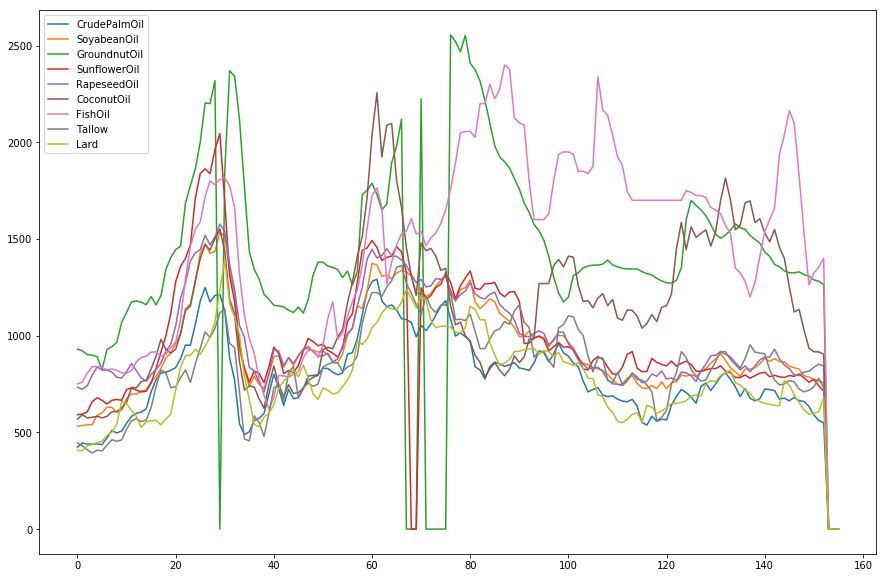

In [15]:
dfx = df.drop(columns=['Year', 'Mon'])
dfx.plot(figsize=(15, 10))
pyplot.show()

# Data Visualization: Scatter Plot

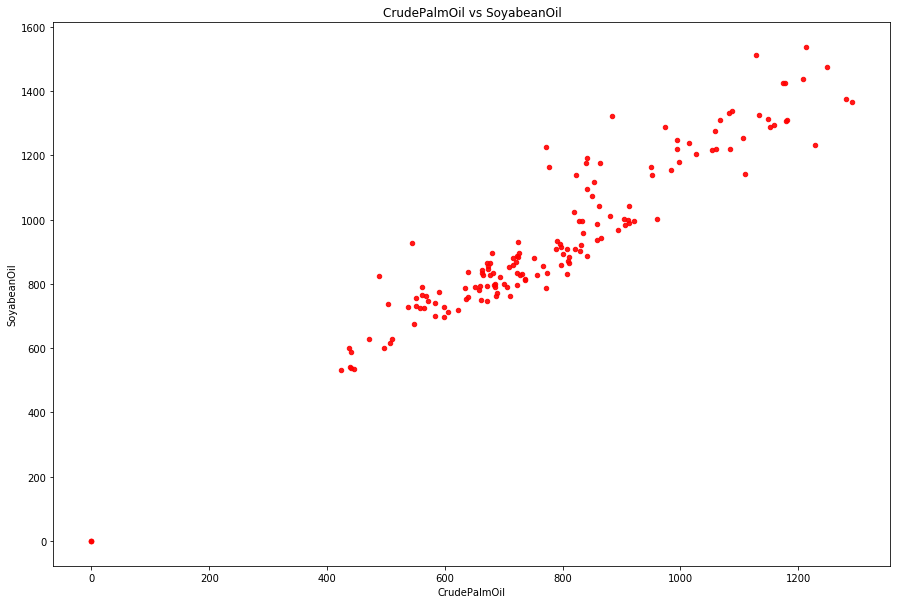

In [16]:
df.plot(kind='scatter', x='CrudePalmOil', y='SoyabeanOil', alpha=0.9, color='red', figsize=(15, 10))
plt.xlabel('CrudePalmOil')
plt.ylabel('SoyabeanOil')
plt.title('CrudePalmOil vs SoyabeanOil')
plt.show()

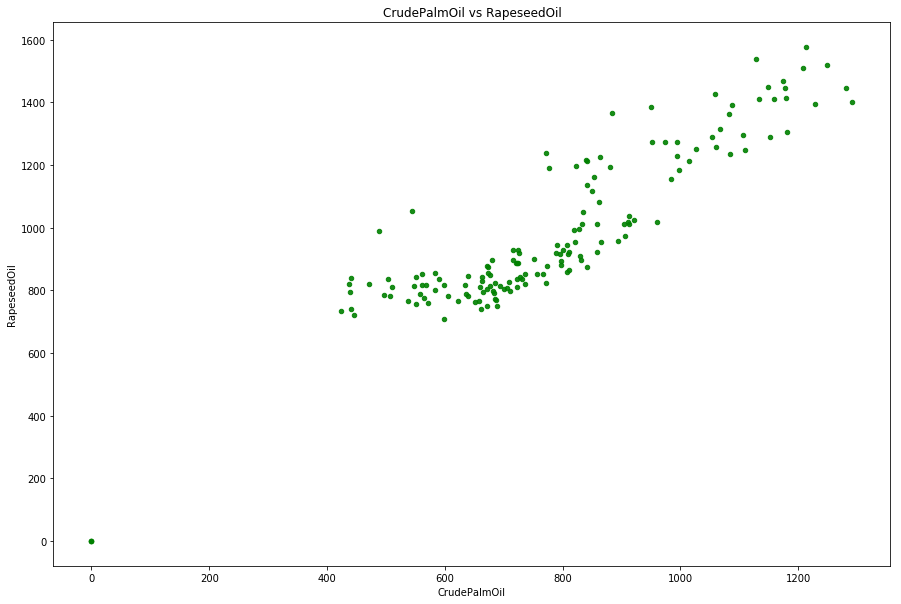

In [17]:
df.plot(kind='scatter', x='CrudePalmOil', y='RapeseedOil', alpha=0.9, color='green', figsize=(15, 10))
plt.xlabel('CrudePalmOil')
plt.ylabel('RapeseedOil')
plt.title('CrudePalmOil vs RapeseedOil')
plt.show()

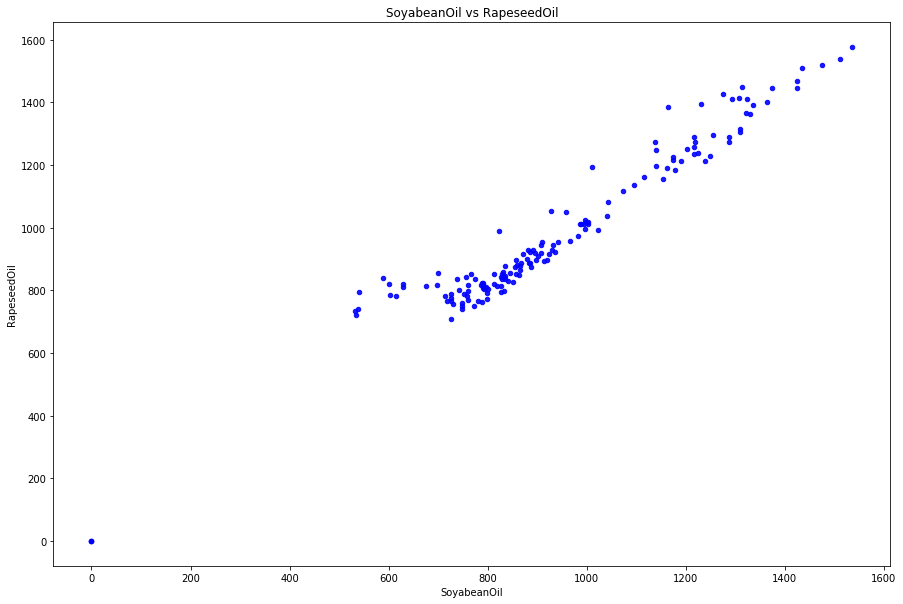

In [18]:
df.plot(kind='scatter', x='SoyabeanOil', y='RapeseedOil', alpha=0.9, color='blue', figsize=(15, 10))
plt.xlabel('SoyabeanOil')
plt.ylabel('RapeseedOil')
plt.title('SoyabeanOil vs RapeseedOil')
plt.show()

# Data Visualization: Scatter Plot (with Regression Line)

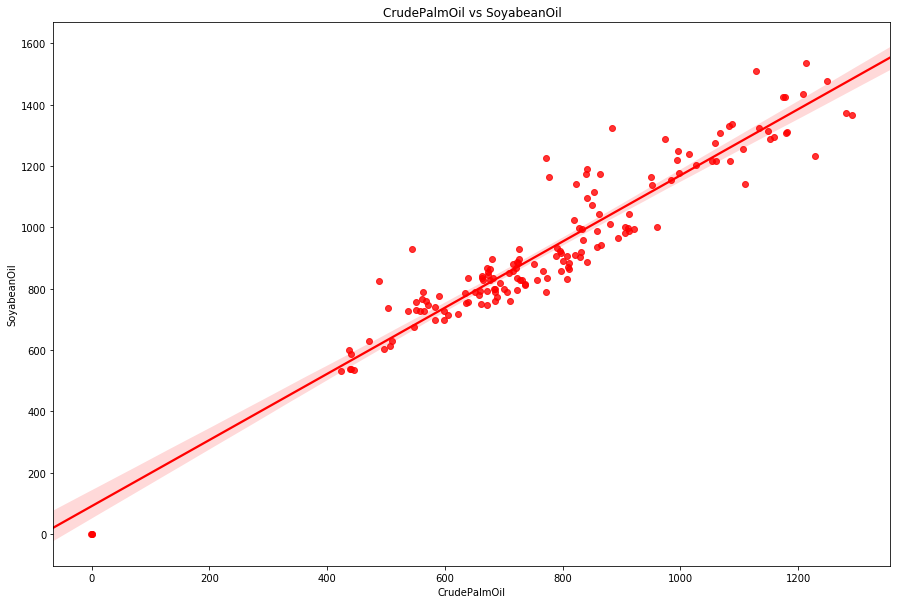

In [19]:
plt.figure(figsize=(15,10))
plt.title('CrudePalmOil vs SoyabeanOil')
ax = sns.regplot(x="CrudePalmOil", y="SoyabeanOil", data=df.ix[:,3:11], x_jitter=.1, color='red')

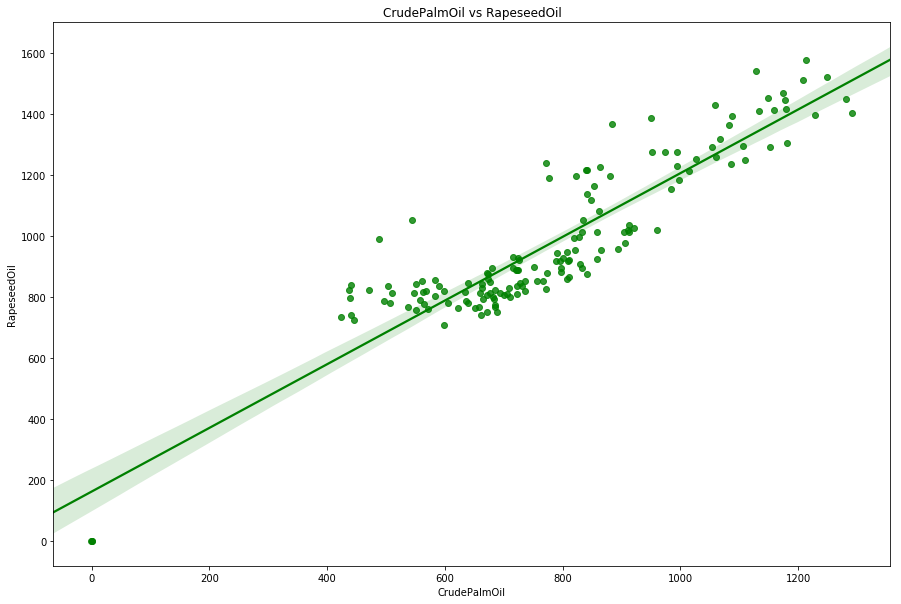

In [20]:
plt.figure(figsize=(15,10))
plt.title('CrudePalmOil vs RapeseedOil')
ax = sns.regplot(x="CrudePalmOil", y="RapeseedOil", data=df.ix[:,3:11], x_jitter=.1, color='green')

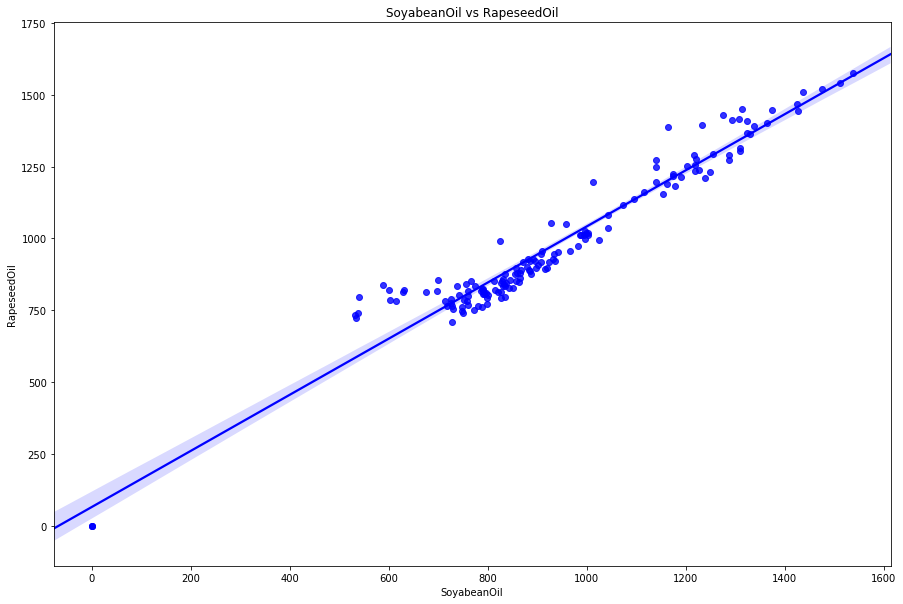

In [21]:
plt.figure(figsize=(15,10))
plt.title('SoyabeanOil vs RapeseedOil')
ax = sns.regplot(x="SoyabeanOil", y="RapeseedOil", data=df.ix[:,3:11], x_jitter=.1, color='blue')

# Data Visualization: Boxplot

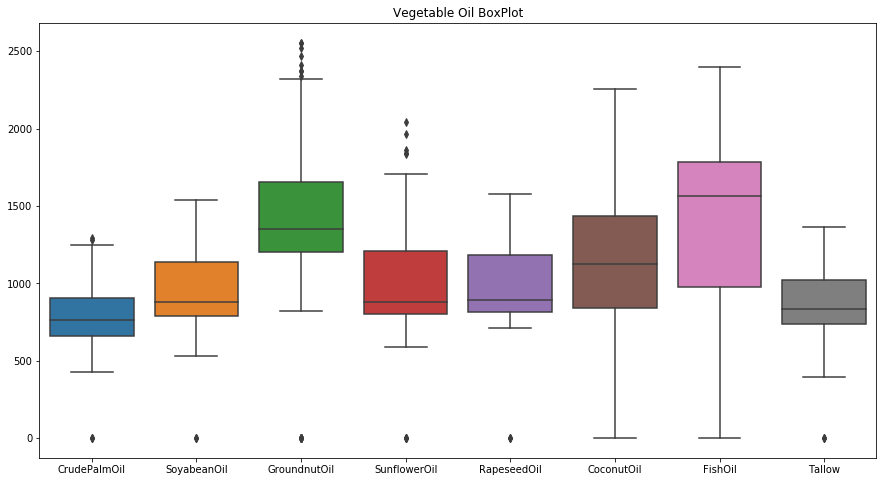

In [22]:
import seaborn as sns

plt.figure(figsize=(15,8))
plt.title('Vegetable Oil BoxPlot')
sns.boxplot(data=df.ix[:,3:11])

# Data Visualization: Histogram

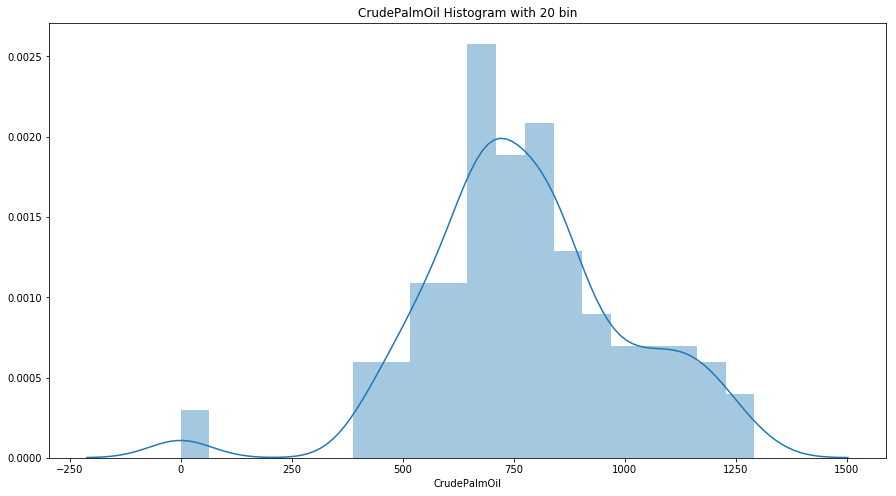

In [23]:
plt.figure(figsize=(15,8))
plt.title('CrudePalmOil Histogram with 20 bin')
sns.distplot( df["CrudePalmOil"], bins=20 )

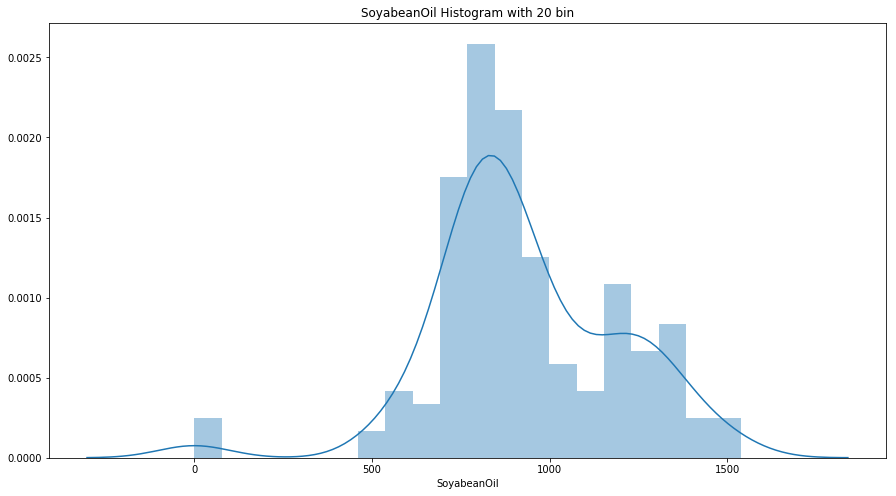

In [24]:
plt.figure(figsize=(15,8))
plt.title('SoyabeanOil Histogram with 20 bin')
sns.distplot( df["SoyabeanOil"], bins=20 )

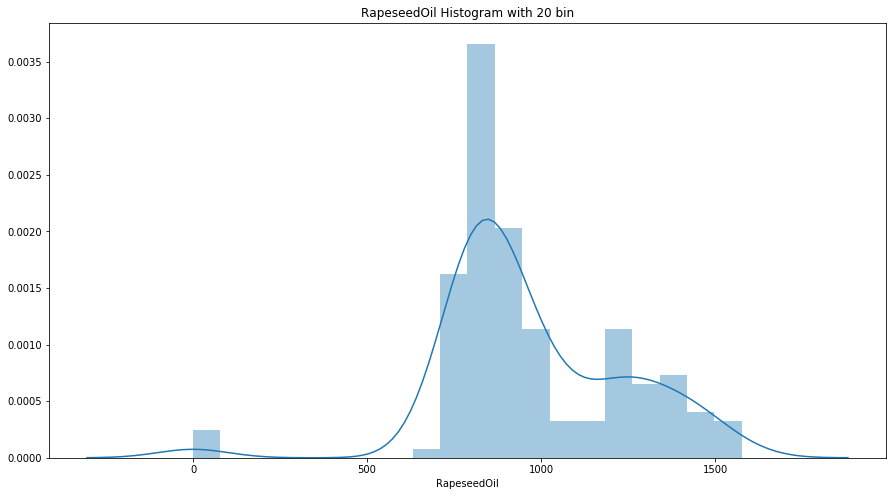

In [25]:
plt.figure(figsize=(15,8))
plt.title('RapeseedOil Histogram with 20 bin')
sns.distplot( df["RapeseedOil"], bins=20)

# Data Visualization: Price Average by Year

In [27]:
df.Year.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018], dtype=int64)

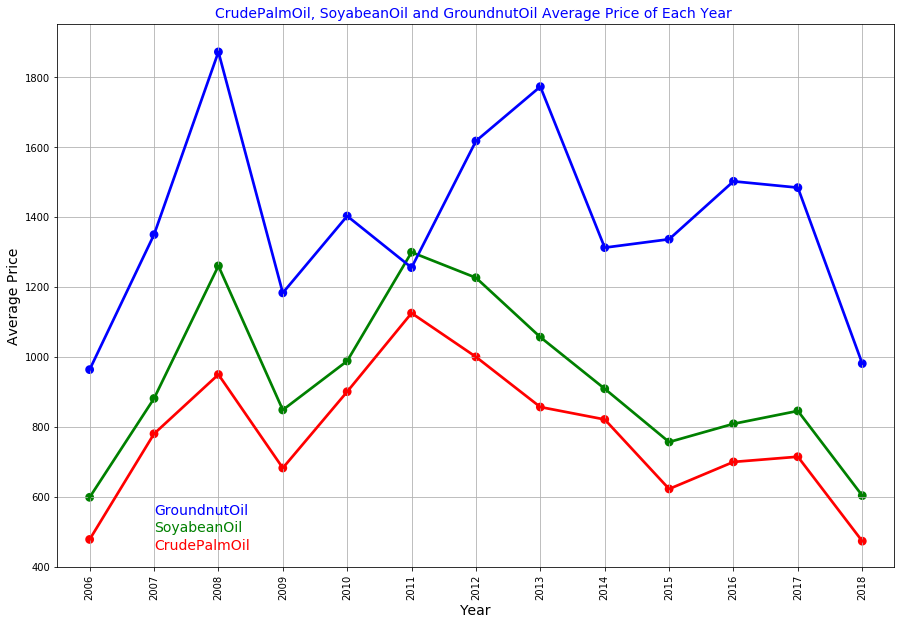

In [48]:
year_list=list(df.Year.unique())

CrudePalmOil=[]
SoyabeanOil=[]
GroundnutOil=[]

for i in year_list:
    x=df[df.Year==i]
    CrudePalmOil.append(sum(x['CrudePalmOil'])/len(x))
    SoyabeanOil.append(sum(x['SoyabeanOil'])/len(x))
    GroundnutOil.append(sum(x['GroundnutOil'])/len(x))
df5=pd.DataFrame({'year_list':year_list,'CrudePalmOil':CrudePalmOil,'SoyabeanOil':SoyabeanOil,'GroundnutOil':GroundnutOil})

f,ax1=plt.subplots(figsize=(15,10))
sns.pointplot(x=year_list,y=CrudePalmOil,data=df5,color='red',alpha=0.7)
sns.pointplot(x=year_list,y=SoyabeanOil,data=df5,color='green',alpha=0.7)
sns.pointplot(x=year_list,y=GroundnutOil,data=df5,color='blue',alpha=0.7)

plt.xticks(rotation=90)
plt.text(1,450,'CrudePalmOil',color='red',fontsize=14)
plt.text(1,500,'SoyabeanOil',color='green',fontsize=14)
plt.text(1,550,'GroundnutOil', color='blue',fontsize=14)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('CrudePalmOil, SoyabeanOil and GroundnutOil Average Price of Each Year ',color='blue',fontsize=14)
plt.grid()